<a href="https://colab.research.google.com/github/curbierel/PCO/blob/main/shifumi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
import os
import random
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf
import tensorflow_datasets as tfd9

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

# -----
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from tensorflow.python.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import decode_predictions

from tensorflow.keras import layers
import time

from keras.preprocessing.image import ImageDataGenerator

In [ ]:
def temps():
  instantT=time.time
  return instantT


In [ ]:
### Gestion de la graine

In [ ]:
seed = 42

os.environ['PYTHONHASHSEED'] = str(seed)
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
import tensorflow_datasets as tfds
from tensorflow.keras.utils import to_categorical

## Loading images and labels
(X_train, y_train) = tfds.load(
    "rock_paper_scissors",
    batch_size=-1,
    split='train',
    as_supervised=True,  # Include labels
)
(X_test, y_test) = tfds.load(
    "rock_paper_scissors",
    batch_size=-1,
    split='test',
    as_supervised=True,  # Include labels
)
## Resizing images
train_ds = tf.image.resize(X_train, (300, 300))
test_ds = tf.image.resize(X_test, (300, 300))

## Rescaling images

## Transforming labels to correct format
train_labels = to_categorical(y_train, num_classes=3)
test_labels = to_categorical(y_test, num_classes=3)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/rock_paper_scissors/3.0.0.incompleteHBRPOI/rock_paper_scissors-train.tfrecord


  0%|          | 0/2520 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/rock_paper_scissors/3.0.0.incompleteHBRPOI/rock_paper_scissors-test.tfrecord


  0%|          | 0/372 [00:00<?, ? examples/s]

Dataset rock_paper_scissors downloaded and prepared to /root/tensorflow_datasets/rock_paper_scissors/3.0.0. Subsequent calls will reuse this data.
Instructions for updating:
Use `tf.data.Dataset.get_single_element()`.


Instructions for updating:
Use `tf.data.Dataset.get_single_element()`.


On a bien 2 dataset, pour le train et le test

In [ ]:
 print('On a ',len(train_ds),' images de train qui ont une shape de ',  train_ds[0].shape)
 print("Et ",len(test_ds)," de test qui ont aussi une shape de ",test_ds[0].shape)
print('Pourcentage que réprésente le test:', (1-(len(train_ds)-len(test_ds))/len(train_ds))*100," %")

On a  2520  images de train qui ont une shape de  (300, 300, 3)
Et  372  de test qui ont aussi une shape de  (300, 300, 3)
Pourcentage que réprésente le test: 14.761904761904765  %


In [ ]:
# Normalize pixel values to be between 0 and 1
train_ds=train_ds/255.0
test_ds=test_ds/255.0

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


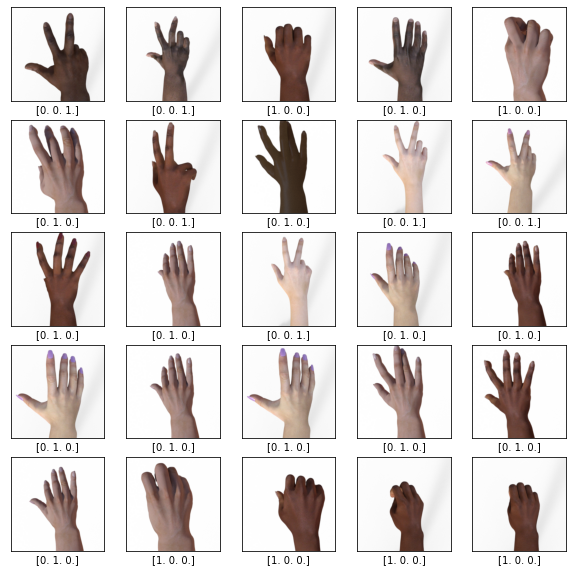

In [ ]:
# Affichage des images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    
    plt.imshow(train_ds[i])
    plt.xlabel(train_labels[i])
plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3, 3), activation='relu', input_shape=(300, 300, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))

DATA AUGMENTATION

In [ ]:
model.add(tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'))
model.add(tf.keras.layers.experimental.preprocessing.RandomRotation(0.2))

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(3,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 128)      0

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

history=model.fit(train_ds, train_labels,  steps_per_epoch=25,epochs=20, validation_split=0.2)

Epoch 1/20
25/25 [==============================] - 24s 456ms/step - loss: 1.1090 - accuracy: 0.3735 - val_loss: 0.9233 - val_accuracy: 0.5079
Epoch 2/20
25/25 [==============================] - 6s 241ms/step - loss: 0.4283 - accuracy: 0.8299 - val_loss: 0.1077 - val_accuracy: 0.9782
Epoch 3/20
25/25 [==============================] - 6s 240ms/step - loss: 0.3101 - accuracy: 0.8904 - val_loss: 0.5306 - val_accuracy: 0.7579
Epoch 4/20
25/25 [==============================] - 6s 242ms/step - loss: 0.3387 - accuracy: 0.8606 - val_loss: 0.3213 - val_accuracy: 0.8532
Epoch 5/20
25/25 [==============================] - 6s 242ms/step - loss: 0.1067 - accuracy: 0.9598 - val_loss: 0.0045 - val_accuracy: 0.9980
Epoch 6/20
25/25 [==============================] - 6s 243ms/step - loss: 0.0097 - accuracy: 0.9965 - val_loss: 0.0363 - val_accuracy: 0.9901
Epoch 7/20
25/25 [==============================] - 6s 244ms/step - loss: 0.0090 - accuracy: 0.9975 - val_loss: 0.0138 - val_accuracy: 0.9980
Epoch

In [ ]:
train_ds.shape

TensorShape([2520, 300, 300, 3])

In [ ]:
train_labels.shape

(2520, 3)

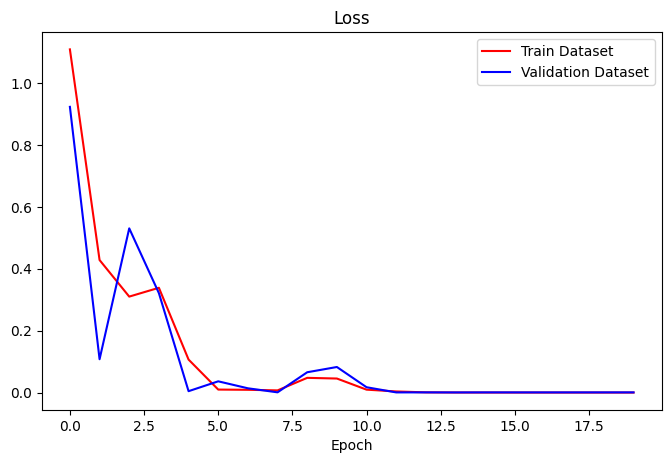

In [ ]:
plt.figure(figsize=(8, 5), dpi=100)
plt.title("Loss")
plt.plot(history.history['loss'], 'r',label="Train Dataset")
plt.plot(history.history['val_loss'], 'b',label="Validation Dataset")
plt.xlabel("Epoch")
plt.legend()
plt.show()

# Nouvelle section

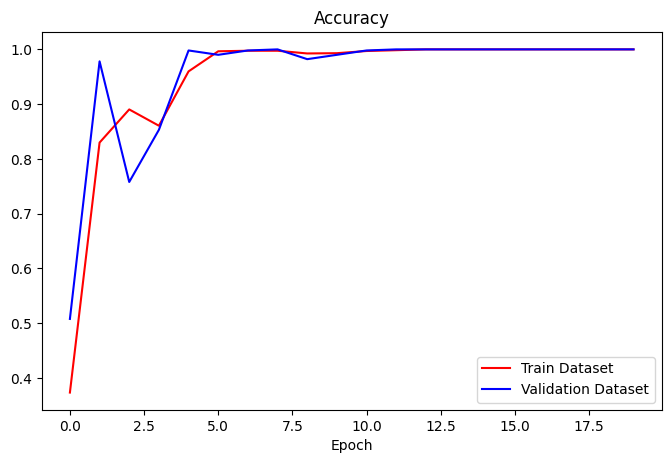

In [ ]:
plt.figure(figsize=(8, 5), dpi=100)
plt.title("Accuracy")
plt.plot(history.history['accuracy'], 'r',label="Train Dataset")
plt.plot(history.history['val_accuracy'], 'b', label="Validation Dataset")
plt.xlabel("Epoch")
plt.legend()
plt.show()

In [ ]:
model.evaluate(train_ds, train_labels)

79/79 [==============================] - 3s 34ms/step - loss: 1.4772e-04 - accuracy: 1.0000


[0.00014771913993172348, 1.0]

In [ ]:
y_predict_train = np.argmax(model.predict(train_ds), axis=-1)

In [ ]:
print(y_predict_train)

[2 2 0 ... 1 1 1]


In [ ]:
train_labels=np.argmax(train_labels,axis=-1)

In [ ]:
print(train_labels)

[2 2 0 ... 1 1 1]


In [ ]:
import os
import random

import numpy as np

import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
cm = confusion_matrix(train_labels, y_predict_train, normalize='true')

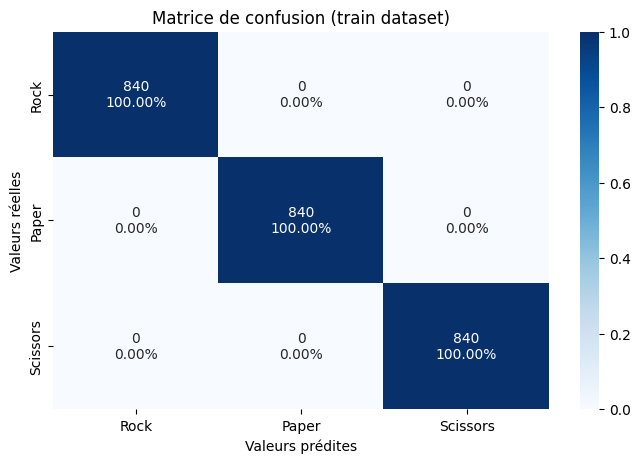

In [ ]:
counts = ["{0:0.0f}\n".format(value) for value in confusion_matrix(train_labels, y_predict_train, normalize=None).flatten()]
percentages = ["{0:.2%}".format(value) for value in confusion_matrix(train_labels, y_predict_train, normalize='true').flatten()]

box_labels = [f"{v1}{v2}" for v1, v2 in zip(counts, percentages)]
box_labels = np.asarray(box_labels).reshape(cm.shape[0],cm.shape[1])

plt.figure(figsize=(8,5), dpi=100)

plt.title("Matrice de confusion (train dataset)")

sns.heatmap(cm,
            vmin=0.0,
            vmax=1.0,
            cmap='Blues',
            annot=box_labels,
            fmt='',
            xticklabels=["Rock", "Paper", "Scissors"],
            yticklabels=["Rock", "Paper", "Scissors"])

plt.xlabel("Valeurs prédites")
plt.ylabel("Valeurs réelles")

plt.show()

In [ ]:
model.evaluate(test_ds, test_labels)

12/12 [==============================] - 1s 86ms/step - loss: 1.6329 - accuracy: 0.7581


[1.6329371929168701, 0.7580645084381104]

In [ ]:
y_predict_test = np.argmax(model.predict(test_ds), axis=-1)

In [ ]:
test_labels=np.argmax(test_labels,axis=-1)

In [ ]:
cm = confusion_matrix(test_labels, y_predict_test, normalize='true')

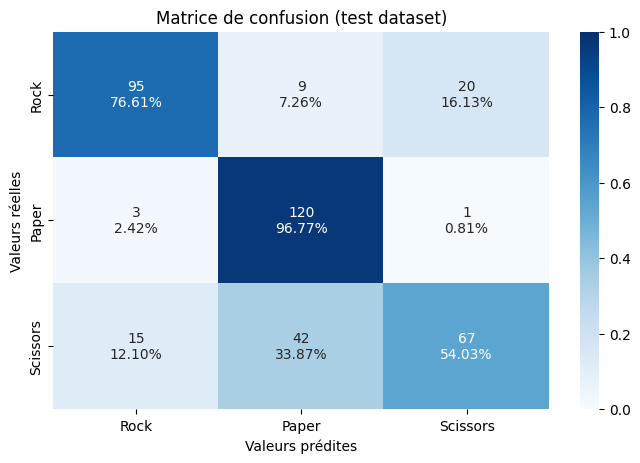

In [ ]:
counts = ["{0:0.0f}\n".format(value) for value in confusion_matrix(test_labels, y_predict_test, normalize=None).flatten()]
percentages = ["{0:.2%}".format(value) for value in confusion_matrix(test_labels, y_predict_test, normalize='true').flatten()]

box_labels = [f"{v1}{v2}" for v1, v2 in zip(counts, percentages)]
box_labels = np.asarray(box_labels).reshape(cm.shape[0],cm.shape[1])

plt.figure(figsize=(8,5), dpi=100)

plt.title("Matrice de confusion (test dataset)")

sns.heatmap(cm,
            vmin=0.0,
            vmax=1.0,
            cmap='Blues',
            annot=box_labels,
            fmt='',
            xticklabels=["Rock", "Paper", "Scissors"],
            yticklabels=["Rock", "Paper", "Scissors"])

plt.xlabel("Valeurs prédites")
plt.ylabel("Valeurs réelles")

plt.show()